In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Load data

In [2]:
df = pd.read_csv(r'D:\hk\k-means-clustering\Mall_Customers.csv')

In [3]:
print("Shape of the data is = ", df.shape)
df.head()

Shape of the data is =  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

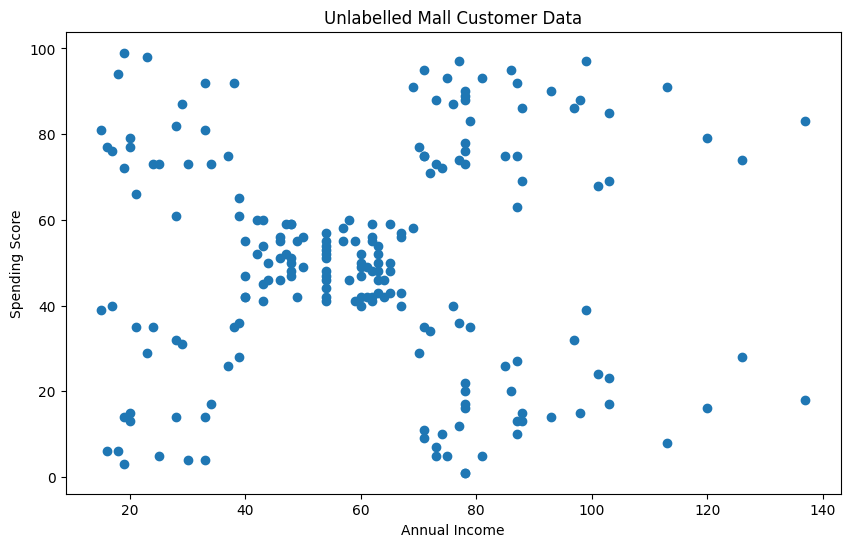

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

### Select the columns

In [5]:
X = df.iloc[:, [3, 4]].values
print(type(X))
X[: 5]


<class 'numpy.ndarray'>


array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

### Choosing the number of clusters

In [6]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

Text(0, 0.5, 'Clustering Score')

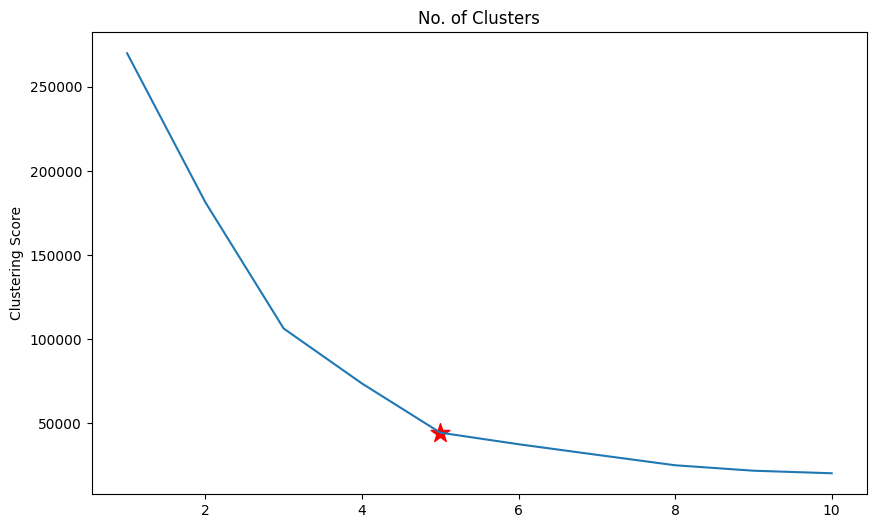

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5, clustering_score[4], s = 200, c = 'red', marker = '*')
plt.title('The Elbow Method')
plt.title('No. of Clusters')
plt.ylabel('Clustering Score')

In [8]:
kmeans = KMeans(n_clusters=5, init= 'random', random_state=42)

In [9]:
kmeans.fit(X)

,n_clusters,5
,init,'random'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [10]:
prediction = kmeans.predict(X)

In [11]:
df['Cluster'] = prediction

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


In [13]:
print(df['Cluster'].unique())

[0 1 4 3 2]


Text(0.5, 1.0, 'Customer Clusters')

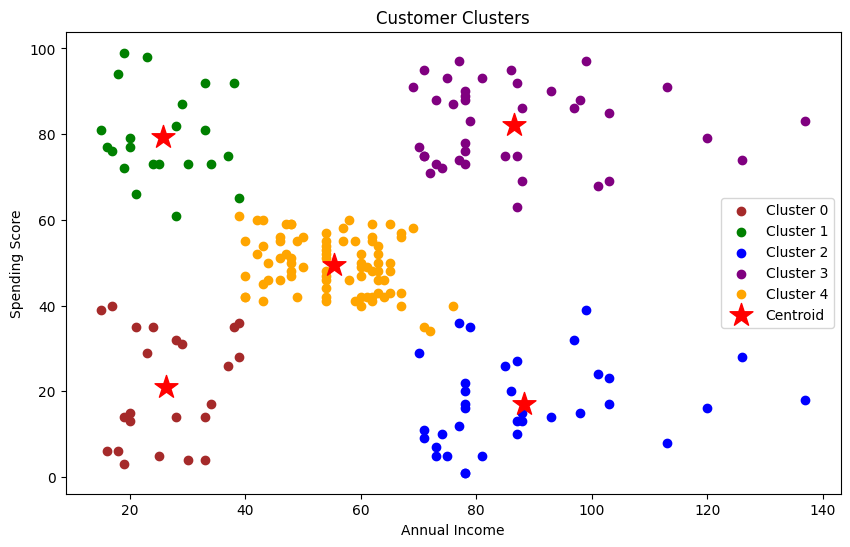

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], c = 'blue',  label = 'Cluster 2')
plt.scatter(X[prediction == 3, 0], X[prediction == 3, 1], c = 'purple',  label = 'Cluster 3')
plt.scatter(X[prediction == 4, 0], X[prediction == 4, 1], c = 'orange',  label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')